In [41]:
from IPython.core.display import Image
import os

# Azure LangChain integrations and plugins

### Kia Ora and welcome everyone

Software engineering Capstone project 2024, Massey University, New Zealand. 

**Members:**
- Dale Geronimo
- Jordan Wood
- Kyle Partridge
- Yurika Iwase

**Clients:** 
- Krista Pratico
- Anna Tisch

## What is LangChain?

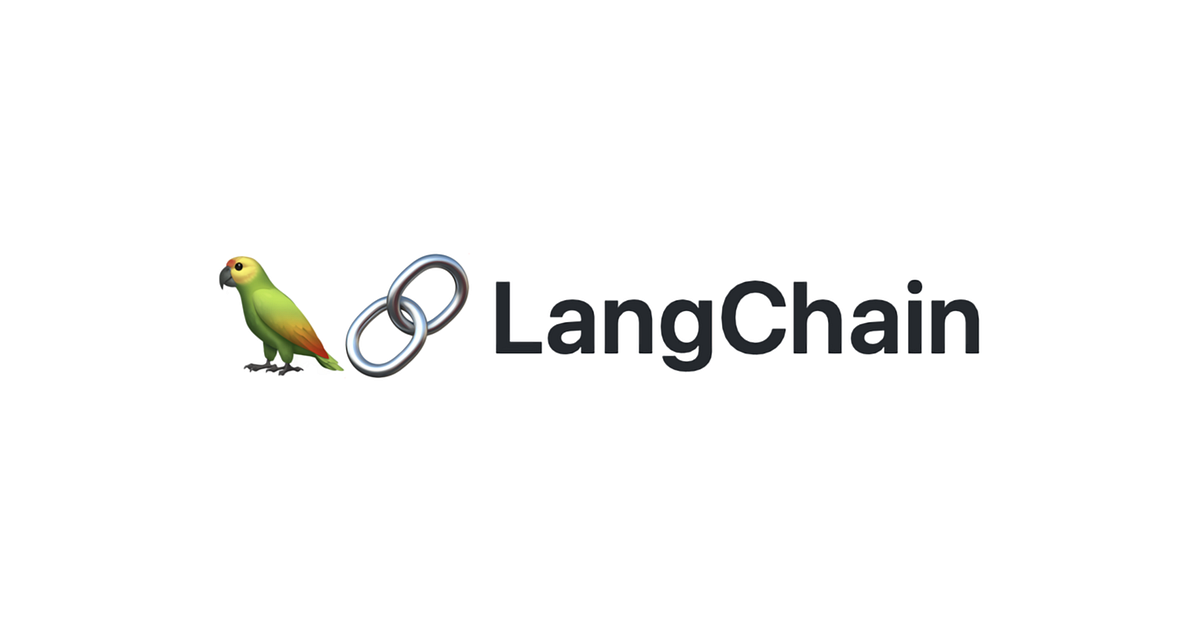

In [23]:
Image('presentation_Images/langchain.png', width=500)

#### Like us at the start, a few of you are probably wondering what LangChain actually is? 

LangChain is a framework designed to integrate various AI services from different companies and organizations, making them easier to combine through LangChain’s service integrations.

Many LangChain classes serve as wrappers around existing SDKs or services. For instance, with Azure AI Services, most LangChain class implementations utilize the Azure Python SDK behind the scenes. These classes often extend from a base LangChain class, allowing them to be easily 'chained' together with other similar classes.

In [25]:
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

In [32]:
model = AzureChatOpenAI(azure_deployment=os.environ['COMPLETIONS_MODEL'],)

In [33]:
prompt = ChatPromptTemplate.from_messages([("system", "repeat after me: {input}")])

In [34]:
chain = prompt | model

In [35]:
response = chain.invoke('hello world!')
response.content

'Hello world!'

With the rapid growth of AI services driven by the current AI movement, it can be challenging for customers to set up and understand how to use these services. It can also be difficult to combine multiple services to fully leverage the available AI capabilities.

LangChain’s built-in language, the LangChain Expression Language (LCEL), simplifies the process of using different classes together. As you can see, with just a few lines of code, a user can initialize a service, provide input, and receive a response. This ease of use remains consistent regardless of the service or combination of services being used. LangChain is highly streamlined and enables seamless integration of AI services from different providers.

## Our goals

Our primary goal was to identify Azure AI service integrations that were partially or fully lacking implementation in LangChain and to create or improve those integrations.

Starting off, our idea was to familiarize ourselves with both LangChain and Azure Services, as none of us had extensive experience with either. We began by experimenting with several Azure OpenAI resources and services, aiming to both understand them better and identify any that were either partially or fully lacking implementation in LangChain. By using these resources, we gained insights into how they were expected to function, explored the SDKs to assess available methods and features, and evaluated which of these were being exposed in LangChain's Azure integrations.

In fact, we created a `getting_started` cookbook with all of our initial work, which is now available in the Azure-samples/openai repository. This not only helped us become familiar with the services but also served as a record of our progress and any issues we encountered, providing helpful information for new customers learning how to use Azure OpenAI services.

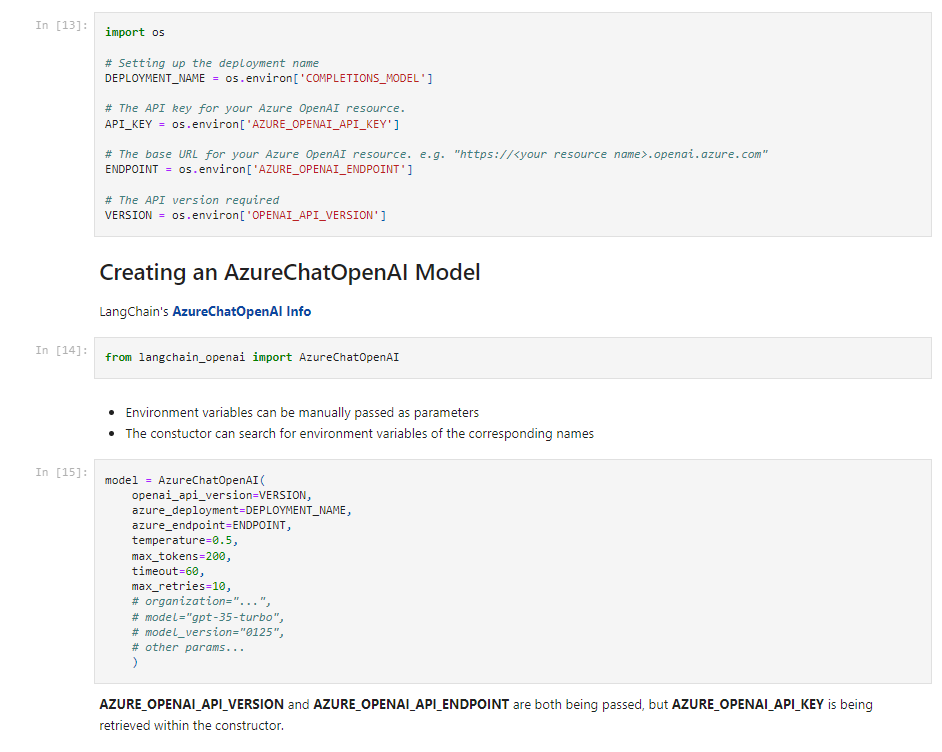

In [38]:
Image('presentation_Images/notebook1.png', width=700)

#### We kept the notebook formal, but we definitely added some character to it and had fun along the way.

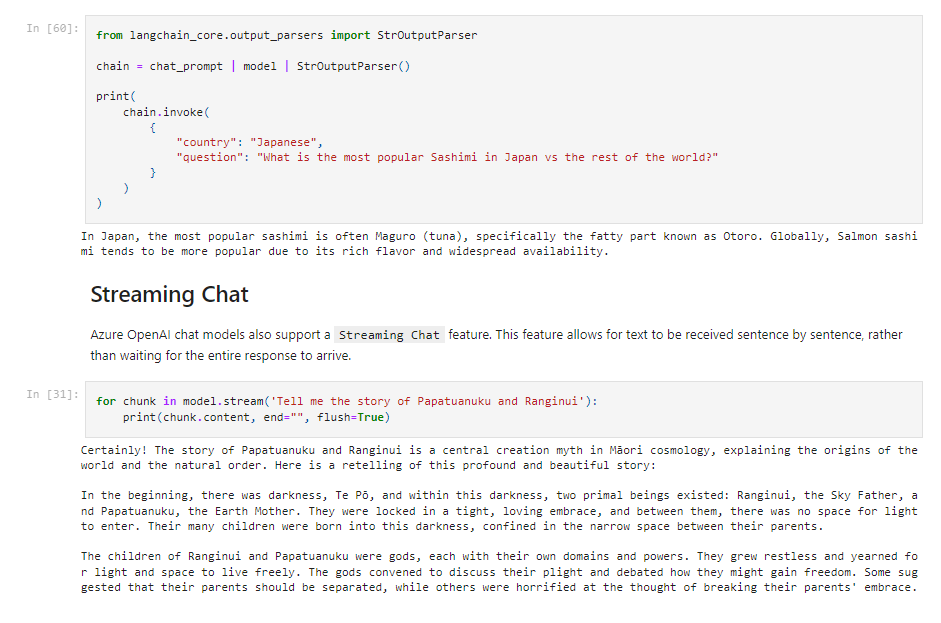

In [40]:
Image('presentation_Images/notebook2.png', width=700)

We then moved on to researching other Azure service implementations, such as Azure AI Content Safety, Azure OpenAI Whisper, Azure AI Translation Services, and others. By exploring the LangChain repository, we were able to identify additional services that were either partially or fully lacking implementation.

## Our Findings

There was big challenge at the start in just trying to find documentation on some classes within LangChain. Once we found a service implementation we would record it down in an excel sheet to keep track of where it was. Additionally, as LangChain is both new and constantly changing and growing. Alot of newer documentation didn't have mention of classes that older version of documentation did, meaning we would often have to refence older docs that were somewhat outdated.

Other issues we ran into is a lot of existing Azure service implementations were using deprecated packages, or Services that weren't favoured anymore. For example, there are quite a few cognitive service integrations despite Azure AI services being the preferred way to access some of these service nowadays.